In [35]:
import pandas as pd

df=pd.read_csv(r"C:\Users\rujha\OneDrive\Desktop\skyhack\test_Ritvik Kumar_Rujhan N Sharma.csv")


In [36]:
# +++++++++++++ Average Delay and Percentage of Late Departures ++++++++++++++

# flights that are actually delayed (delay > 0)
late_flights = df[df['departure_delay_minutes'] > 0]

# Calculate the average delay for these late flights
avg_late_delay = late_flights['departure_delay_minutes'].mean()

# Calculate the percentage of flights that are late
late_flight_percentage = (len(late_flights) / len(df)) * 100

print(f"Average delay for late flights: {avg_late_delay:.2f} minutes")
print(f"Percentage of flights that depart later than scheduled: {late_flight_percentage:.2f}%")

Average delay for late flights: 47.06 minutes
Percentage of flights that depart later than scheduled: 49.61%


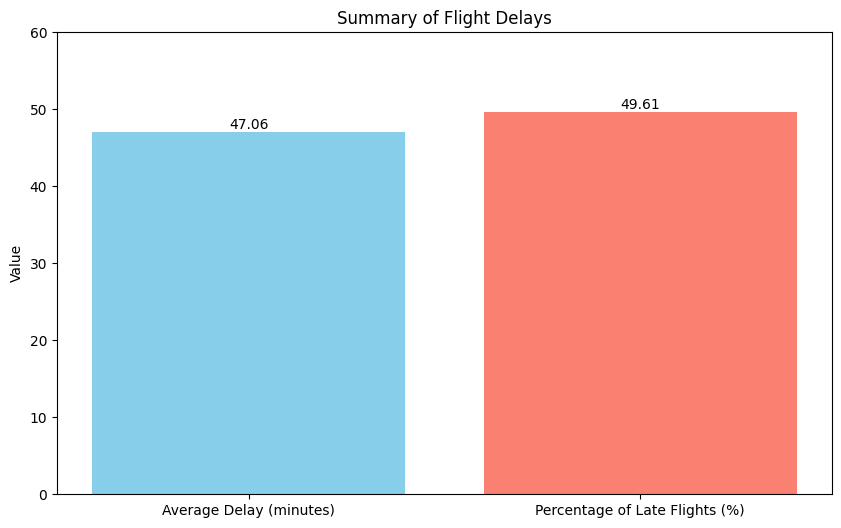

In [37]:
# ++++++++ Visualization ++++++++ 

import matplotlib.pyplot as plt
import numpy as np

avg_late_delay = 47.06
late_flight_percentage = 49.61

data_for_plot = pd.DataFrame({
    'Metric': ['Average Delay (minutes)', 'Percentage of Late Flights (%)'],
    'Value': [avg_late_delay, late_flight_percentage]
})

plt.figure(figsize=(10, 6))
bars = plt.bar(data_for_plot['Metric'], data_for_plot['Value'], color=['skyblue', 'salmon'])
plt.title('Summary of Flight Delays')
plt.ylabel('Value')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, f'{height:.2f}',
             ha='center', va='bottom')

plt.ylim(0, 60) # Set a y-limit for better visual comparison
plt.show()

1). Nearly half of all flights in the dataset experienced a delay.

2). For those that were late, the average delay was substantial, at just over 47 minutes.

These high-level metrics provide a strong starting point for further investigation into the specific factors contributing to these delays.


In [38]:
# ++++++++++++  Scheduled Ground Time vs. Minimum Turn Time +++++++++++++

# We have to determine if flights have suffered delay

# Flights where scheduled ground time is less than or equal to minimum turn time
insufficient_ground_time_flights = df[df['scheduled_ground_time_minutes'] <= df['minimum_turn_minutes']]

# Count the number of such flights
count_insufficient_ground_time = len(insufficient_ground_time_flights)

print(f"Number of flights with scheduled ground time <= minimum turn time: {count_insufficient_ground_time}")

Number of flights with scheduled ground time <= minimum turn time: 652


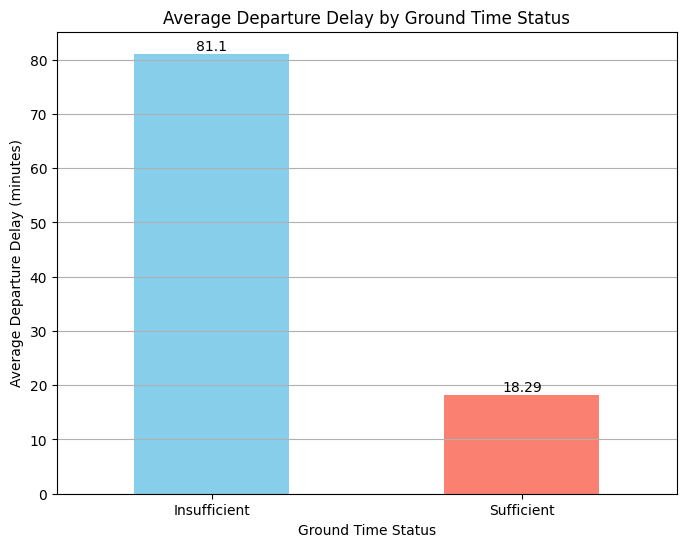

In [39]:
# +++++++++  Visualization ++++++++++

import matplotlib.pyplot as plt
import numpy as np

# Creating a category to distinguish flights with sufficient/insufficient ground time
# (Assuming df is your DataFrame)
df['ground_time_status'] = np.where(df['scheduled_ground_time_minutes'] <= df['minimum_turn_minutes'],
                                     'Insufficient',
                                     'Sufficient')

# Calculate the average departure delay for each group
avg_delay_by_status = df.groupby('ground_time_status')['departure_delay_minutes'].mean()

plt.figure(figsize=(8, 6))
bars = avg_delay_by_status.plot(kind='bar', color=['skyblue', 'salmon'])

# Loop through each bar and add the value as text
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.title('Average Departure Delay by Ground Time Status')
plt.xlabel('Ground Time Status')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

A count of 652 flights indicates that a considerable portion of the schedule is operating on a tight margin.
we can conclude that a substantial number of flights are scheduled with inadequate turnarounds. This could be a major contributor to overall flight difficulty and delays.

The Bar chart shows a contrast between two categories:

    1). The average delay for flights with insufficient ground time is approximately 80 minutes.

    2). The average delay for flights with sufficient ground time is around 18 minutes.






In [40]:
# +++++++++++++ Ratio of Transfer Bags vs. Checked Bags ++++++++++++++++

# Calculating the total checked and transfer bags
total_checked_bags= df['TOTAL_BAGS'].sum()
total_transfer_bags= df['TRANSFER_BAGGAGE'].sum()
total_hot_bags= df['HOT_TRANSFER_BAGGAGE'].sum()

# Finding the ratio
if total_checked_bags>0:
    transfer_bag_ratio = (total_transfer_bags/total_checked_bags )*100
    hot_bag_ratio = (total_hot_bags/total_checked_bags )*100


    print(f"Ratio of transfer bags to total checked bags:{transfer_bag_ratio:.2f}%")
    print(f"Ratio of hot bags to total checked bags:{hot_bag_ratio:.2f}%")
else:
    print("No checked bags found in the dataset.")




Ratio of transfer bags to total checked bags:48.47%
Ratio of hot bags to total checked bags:7.39%


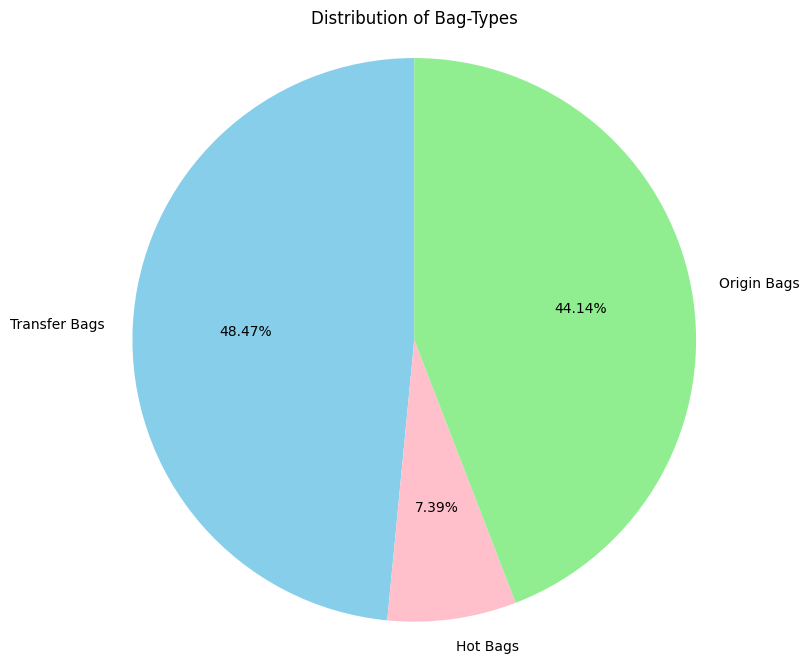

In [19]:
# ++++++++ Visualization ++++++++++

transfer_bag_ratio = 48.47
hot_bag_ratio= 7.39

origin_bag_ratio = 100 - transfer_bag_ratio - hot_bag_ratio

# Data for the pie chart
labels = ['Transfer Bags', 'Hot Bags', 'Origin Bags']
sizes = [transfer_bag_ratio, hot_bag_ratio,  origin_bag_ratio]
colors = ['skyblue', 'pink', 'lightgreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', startangle=90)
plt.title('Distribution of Bag-Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('baggage_ratio_pie_chart.png')
plt.show()

The Pie Chart shows that: 

1) 48.47% of total bags are Transfer Bags
2) 44.14% of total bags are Origin Bags
3) 7.39% of total bags are Hot Bags

This shows that majority of the bags are transfer Bags.

In [41]:
# ++++++++++++++  Passenger Loads and Operational Difficulty +++++++++++++

# We need to find relation between number of passengers and flight delays

correlation= df['TOTAL_PASSENGERS'].corr(df['departure_delay_minutes'])

print(f"Correlation between Total Passengers and Departure Delay: {correlation:.2f}")

Correlation between Total Passengers and Departure Delay: -0.03


Based on the low correlation of -0.03, 

We can conclude that there is a very weak, almost non-existent relationship between the total number of passengers and the length of a flight's departure delay.

In [42]:
# ++++++++++++++++ Special Service Requests and High-Delay Flights +++++++++++++

# We Need to check if flights with special servie requests are more prone to delays

# creating new columns for flights with SSRs
df['has_ssr']= (
    (df['PEOPLE_OPTED_FOR_AIRPORT_WHEELCHAIR'] > 0) |
    (df['PEOPLE_OPTED_FOR_UNACCOMPANIED_MINOR'] > 0) |
    (df['PEOPLE_OPTED_FOR_MANUAL_WHEELCHAIR'] > 0) |
    (df['PEOPLE_OPTED_FOR_ELECTRIC_WHEELCHAIR'] > 0)
)

# Calculating average delay for flights with and without SSRs
avg_delay_with_ssr = df[df['has_ssr']]['departure_delay_minutes'].mean()
avg_delay_without_ssr = df[~df['has_ssr']]['departure_delay_minutes'].mean()

print(f"Average departure delay for flights with SSRs: {avg_delay_with_ssr:.2f} minutes")
print(f"Average departure delay for flights without SSRs: {avg_delay_without_ssr:.2f} minutes")


Average departure delay for flights with SSRs: 23.75 minutes
Average departure delay for flights without SSRs: 21.98 minutes


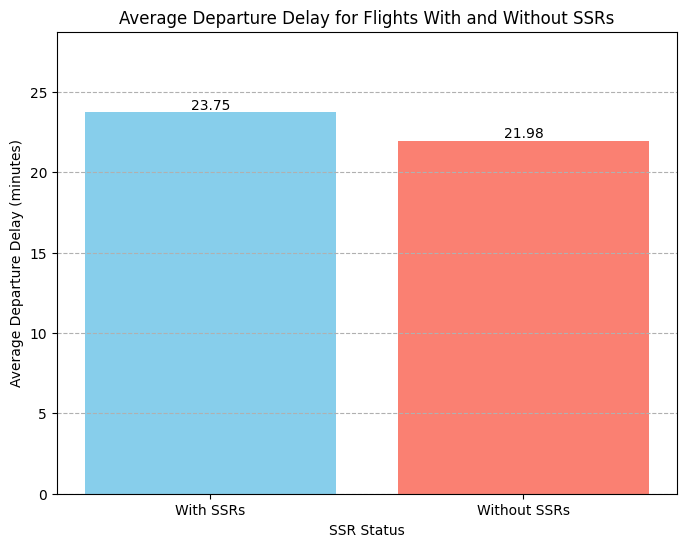

In [20]:
# ++++++++++++++++++ visualization +++++++++++++

avg_delay_with_ssr = 23.75
avg_delay_without_ssr = 21.98

data = {
    'SSR Status': ['With SSRs', 'Without SSRs'],
    'Average Delay (minutes)': [avg_delay_with_ssr, avg_delay_without_ssr]
}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
bars = plt.bar(df_plot['SSR Status'], df_plot['Average Delay (minutes)'], color=['skyblue', 'salmon'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', ha='center', va='bottom')


plt.title('Average Departure Delay for Flights With and Without SSRs')
plt.xlabel('SSR Status')
plt.ylabel('Average Departure Delay (minutes)')
plt.ylim(0, max(avg_delay_with_ssr, avg_delay_without_ssr) + 5)
plt.grid(axis='y', linestyle='--')

# Save the plot to a file
plt.savefig('ssr_delay_bar_chart.png')
plt.show()

The Analysis shows that the flights with Special Service Requests (SSRs) have a slighlty higher average departure delay than those without.

In [43]:
df2=pd.read_csv(r"C:\Users\rujha\OneDrive\Desktop\skyhack\cleaned_final_1.csv")

In [44]:
# Total number of children and the average per flight

total_lap_children = df2['lap_child_count'].sum()
avg_lap_children_per_flight = df2['lap_child_count'].mean()

print(f"Total number of lap children: {total_lap_children}")
print(f"Average lap children per flight: {avg_lap_children_per_flight:.2f}")


Total number of lap children: 5588
Average lap children per flight: 0.01


In [45]:
# Types of Aircraft Fleet

#calculating the count of flights for each aircraft type
aircraft_type_counts= df['carrier'].value_counts()

# Calculating the percentage of flights for each aircraft type
aircraft_type_ratio = df['carrier'].value_counts(normalize=True) * 100

print("Count of flights by aircraft type:")
print(aircraft_type_counts)

print("\nPercentage of flights by aircraft type:")
print(aircraft_type_ratio)

Count of flights by aircraft type:
carrier
Mainline    4502
Express     3597
Name: count, dtype: int64

Percentage of flights by aircraft type:
carrier
Mainline    55.58711
Express     44.41289
Name: proportion, dtype: float64


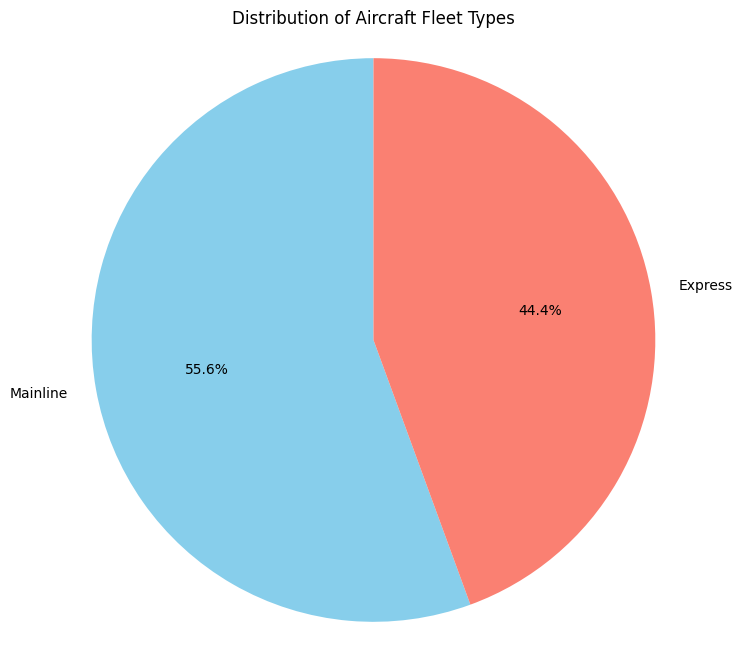

In [46]:
# +++++++++ Visualization ++++++++

# Calculate the counts for each aircraft type
counts = df['carrier'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])

# Add a title
plt.title('Distribution of Aircraft Fleet Types')

# Ensure the pie is drawn as a circle
plt.axis('equal')

# Save the plot to a file
plt.savefig('aircraft_fleet_distribution_pie_chart.png')
plt.show()

# Mainline fleets are mostly long-haul flights and the express fleets are mostly short-haul flights

We can conclude that Mainline carriers are 55.6% of the total 
and the Express carriers are the 44.4% of the original


In [47]:
# No. of people opting for economy 
total_basic_economy = df['TOTAL_BASIC_ECONOMY'].sum()
percentage_basic_economy = (total_basic_economy / df['TOTAL_PASSENGERS'].sum()) * 100

print(f"Total number of passengers in economy-basic: {total_basic_economy}")
print(f"Percentage of passengers in economy-basic: {percentage_basic_economy:.2f}%")

Total number of passengers in economy-basic: 82476
Percentage of passengers in economy-basic: 11.93%


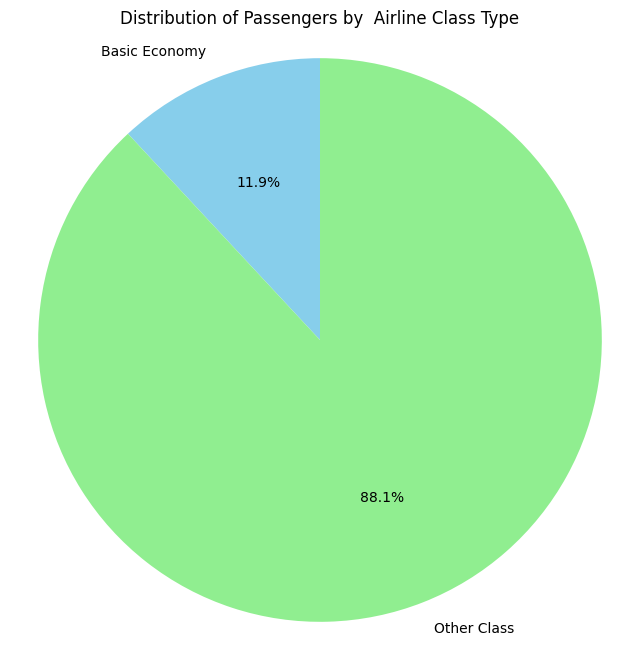

In [48]:

# Calculate the total number of basic economy passengers
total_basic_economy = df['TOTAL_BASIC_ECONOMY'].sum()

# Calculate the total number of non-basic economy passengers
total_passengers = df['TOTAL_PASSENGERS'].sum()
total_non_basic_economy = total_passengers - total_basic_economy

labels = ['Basic Economy', 'Other Class']
sizes = [total_basic_economy, total_non_basic_economy]
colors = ['skyblue', 'lightgreen']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Passengers by  Airline Class Type')
plt.axis('equal')

# Save the plot to a file
plt.savefig('basic_economy_pie_chart.png')
plt.show()

We can conclude that 11.93% of people opted for Economy class

In [49]:
# Bags checked last minute

# Assuming 'BT_CHECKIN_TIME_BEFORE_DEPARTURE_INDAYS' exists
last_minute_checkins = df[df['EARLY_CHECKIN'] < 1]
total_last_minute_bags = last_minute_checkins['TOTAL_BAGS'].sum()
percentage_last_minute = (total_last_minute_bags / df['TOTAL_BAGS'].sum()) * 100

print(f"Total bags checked in last minute: {total_last_minute_bags}")
print(f"Percentage of last-minute bags: {percentage_last_minute:.2f}%")

Total bags checked in last minute: 112499.0
Percentage of last-minute bags: 17.74%


In [61]:

# Filtering for last-minute bags (less than 1 day in advance)
last_minute_bags = df[df['EARLY_CHECKIN'] < 1]

# Group by date and get the sum of total bags for each day
daily_last_minute_bags = last_minute_bags.groupby(df['scheduled_departure_date_local'])['TOTAL_BAGS'].mean()

daily_last_minute_bags_final = daily_last_minute_bags.round(0)

# Step 3: Calculate the average of the daily totals
# average_last_minute_bags_per_day = daily_last_minute_bags.mean()

print(f"Average last-minute bags checked in per day: {daily_last_minute_bags_final}")

Average last-minute bags checked in per day: scheduled_departure_date_local
2025-08-01    69.0
2025-08-02    72.0
2025-08-03    68.0
2025-08-04    65.0
2025-08-05    63.0
2025-08-06    66.0
2025-08-07    51.0
2025-08-08    57.0
2025-08-09    80.0
2025-08-10    61.0
2025-08-11    60.0
2025-08-12    60.0
2025-08-13    61.0
2025-08-14    59.0
2025-08-15    66.0
Name: TOTAL_BAGS, dtype: float64


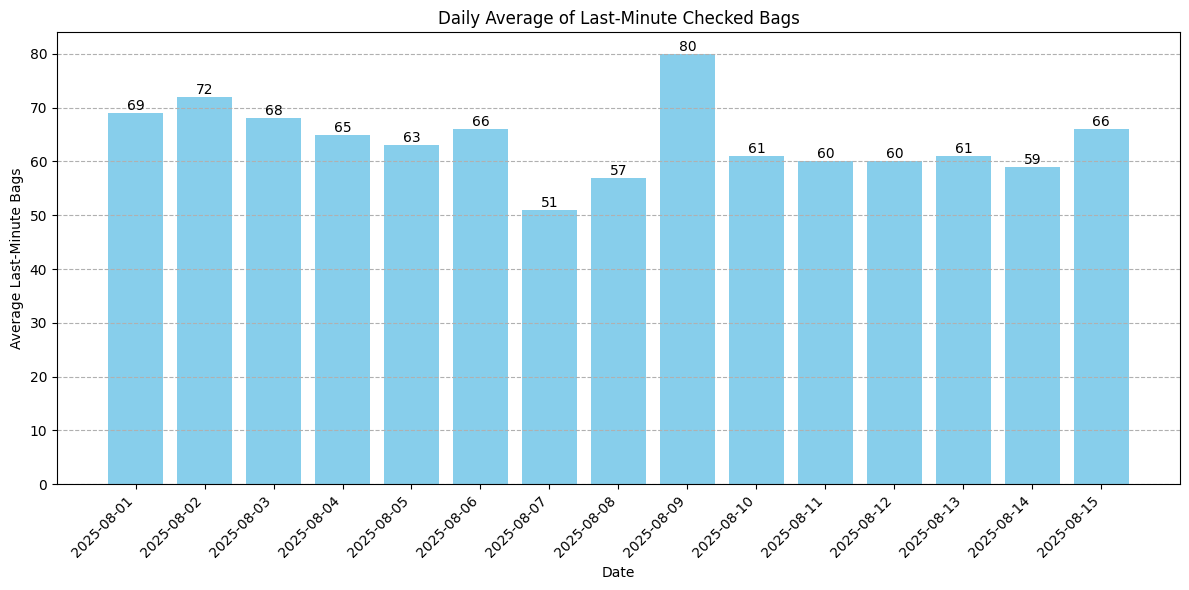

In [ ]:
# +++++++ Visualization +++++++++++

data = {
    '2025-08-01': 69.0, '2025-08-02': 72.0, '2025-08-03': 68.0,
    '2025-08-04': 65.0, '2025-08-05': 63.0, '2025-08-06': 66.0,
    '2025-08-07': 51.0, '2025-08-08': 57.0, '2025-08-09': 80.0,
    '2025-08-10': 61.0, '2025-08-11': 60.0, '2025-08-12': 60.0,
    '2025-08-13': 61.0, '2025-08-14': 59.0, '2025-08-15': 66.0
}
daily_last_minute_bags = pd.Series(data)

plt.figure(figsize=(12, 6))
bars = plt.bar(daily_last_minute_bags.index, daily_last_minute_bags.values, color='skyblue')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, int(height), ha='center', va='bottom')

# Customize the plot
plt.title('Daily Average of Last-Minute Checked Bags')
plt.xlabel('Date')
plt.ylabel('Average Last-Minute Bags')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Save and show the plot
plt.savefig('daily_last_minute_bags_bar_chart.png')
plt.show()

In [65]:
# Date-wise delayed flights

# Ensure your date column is in a datetime format first
df['scheduled_departure_date_local'] = pd.to_datetime(df['scheduled_departure_date_local'], errors='coerce')

# Filter for delayed flights and group by date
delayed_flights_by_date = df[df['departure_delay_minutes'] > 0]
delayed_count_by_date = delayed_flights_by_date.groupby(
    delayed_flights_by_date['scheduled_departure_date_local'].dt.date
)['flight_number'].count()

print("Number of delayed flights by date:")
print(delayed_count_by_date)

Number of delayed flights by date:
scheduled_departure_date_local
2025-08-01    316
2025-08-02    240
2025-08-03    255
2025-08-04    236
2025-08-05    158
2025-08-06    240
2025-08-07    311
2025-08-08    222
2025-08-09    268
2025-08-10    382
2025-08-11    251
2025-08-12    300
2025-08-13    263
2025-08-14    295
2025-08-15    281
Name: flight_number, dtype: int64


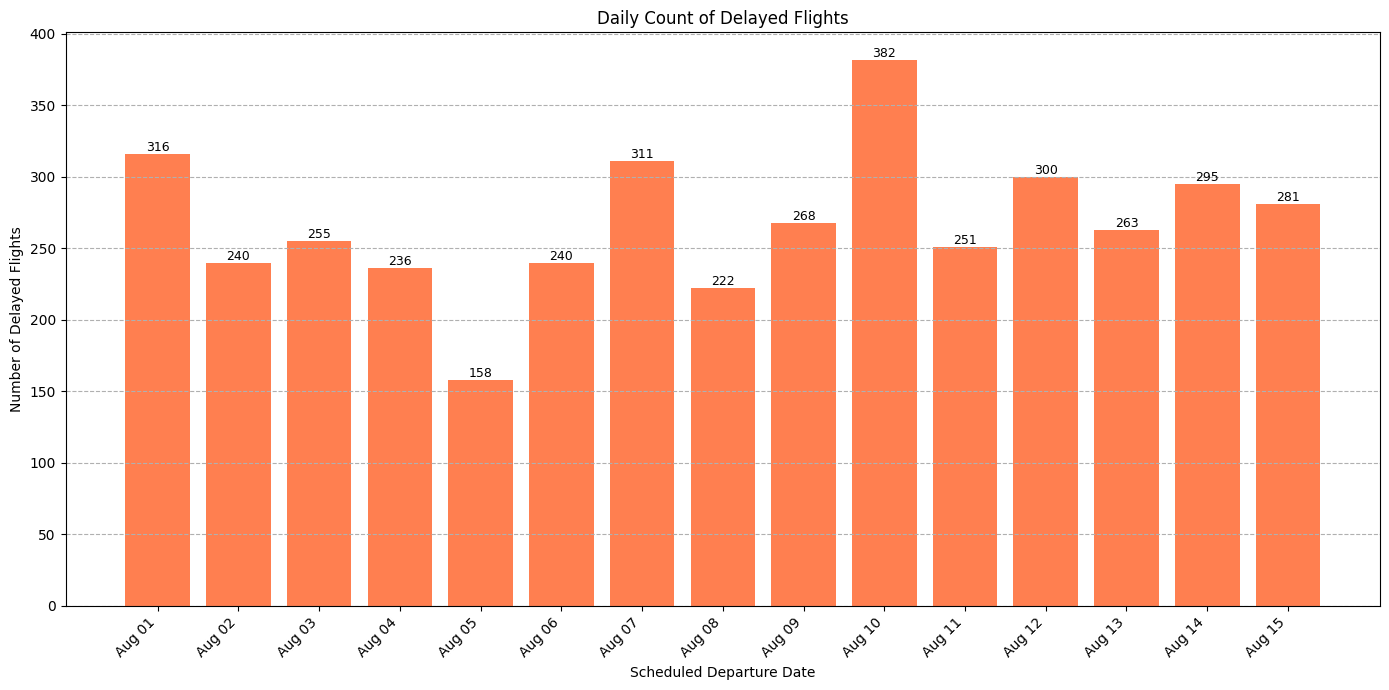

In [ ]:

data = {
    '2025-08-01': 316, '2025-08-02': 240, '2025-08-03': 255,
    '2025-08-04': 236, '2025-08-05': 158, '2025-08-06': 240,
    '2025-08-07': 311, '2025-08-08': 222, '2025-08-09': 268,
    '2025-08-10': 382, '2025-08-11': 251, '2025-08-12': 300,
    '2025-08-13': 263, '2025-08-14': 295, '2025-08-15': 281
}
delayed_count_by_date = pd.Series(data)


dates_formatted = [pd.to_datetime(d).strftime('%b %d') for d in delayed_count_by_date.index]

plt.figure(figsize=(14, 7))
bars = plt.bar(dates_formatted, delayed_count_by_date.values, color='coral')


for bar in bars:
    height = bar.get_height()
 
    plt.text(bar.get_x() + bar.get_width()/2.0, height, int(height), 
             ha='center', va='bottom', fontsize=9)

plt.title('Daily Count of Delayed Flights')
plt.xlabel('Scheduled Departure Date')
plt.ylabel('Number of Delayed Flights')
plt.xticks(rotation=45, ha='right') # Rotate dates for better readability
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.show()

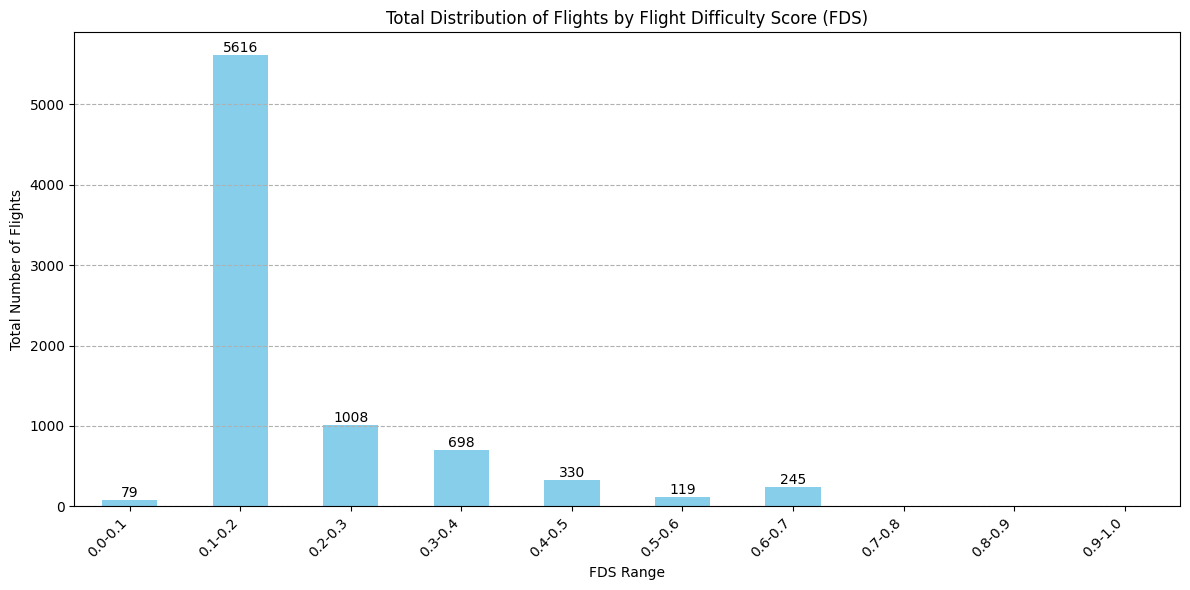

In [71]:
bins = np.arange(0, 1.1, 0.1)
labels = [f'{i:.1f}-{i+0.1:.1f}' for i in bins[:-1]]

# Use pd.cut to categorize each flight into a bin
# The 'right=False' argument ensures the range is inclusive of the lower bound
df['FDS_bin'] = pd.cut(df['FLIGHT_DIFFICULTY_SCORE'], bins=bins, labels=labels, right=False)

# Count the total number of flights in each bin
fds_distribution = df['FDS_bin'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = fds_distribution.plot(kind='bar', color='skyblue')

# Add value labels on top of the bars
for bar in bars.patches:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, int(height), ha='center', va='bottom')

plt.title('Total Distribution of Flights by Flight Difficulty Score (FDS)')
plt.xlabel('FDS Range')
plt.ylabel('Total Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

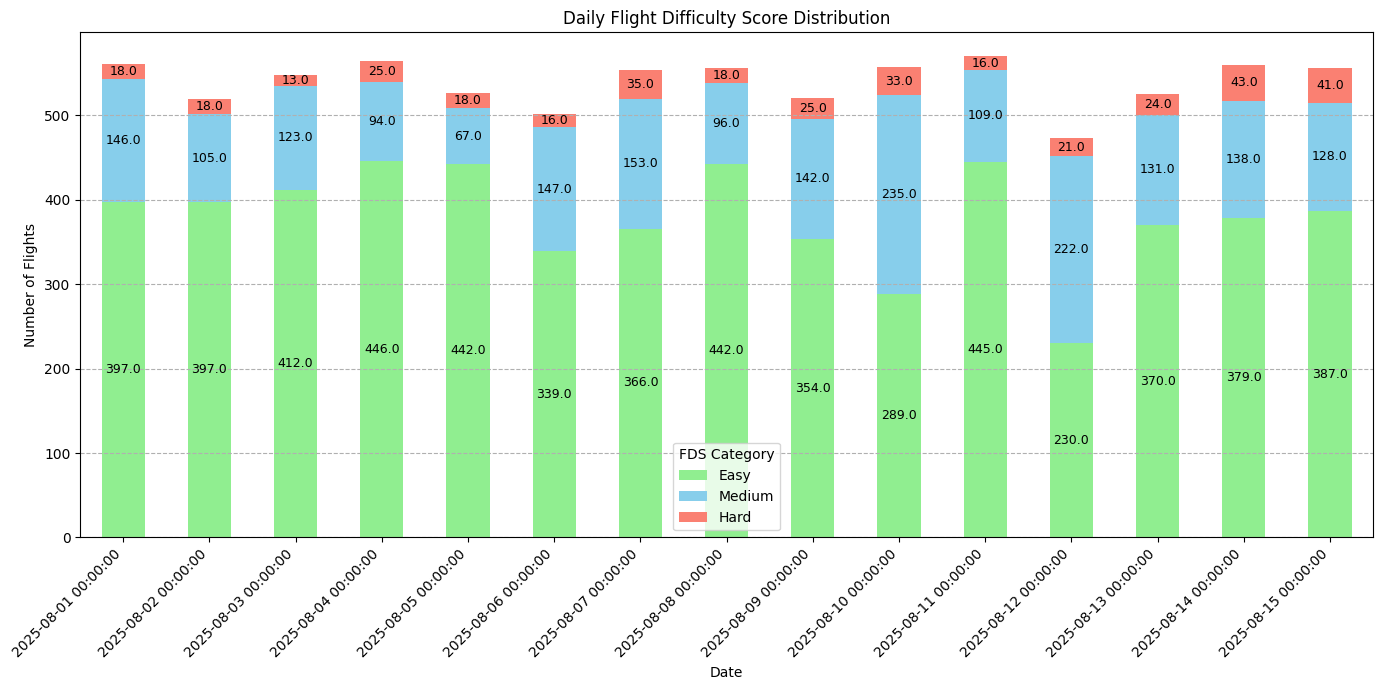

In [ ]:
# +++++++++ Date-wise Flight_difficulty_score distribution +++++++++++++

bins = [0, 0.2, 0.5, np.inf]
labels = ['Easy', 'Medium', 'Hard']

df['FDS_category'] = pd.cut(df['FLIGHT_DIFFICULTY_SCORE'], bins=bins, labels=labels, right=False)

# Group by date and FDS category, then count the flights
daily_fds_distribution = df.groupby(['scheduled_departure_date_local', 'FDS_category'], observed=False).size().unstack(fill_value=0)

# Created a stacked bar plot
ax = daily_fds_distribution.plot(kind='bar', stacked=True, figsize=(14, 7), color=['lightgreen', 'skyblue', 'salmon'])

# Adding  value labels on top of the bars
for container in ax.containers:
    labels = [v.get_height() if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=9)

# Adding labels, title, and legend
plt.title('Daily Flight Difficulty Score Distribution')
plt.xlabel('Date')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45, ha='right')
plt.legend(title='FDS Category')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

# Save and display the plot
plt.savefig('daily_fds_distribution_bar_plot_with_values.png')
plt.show()

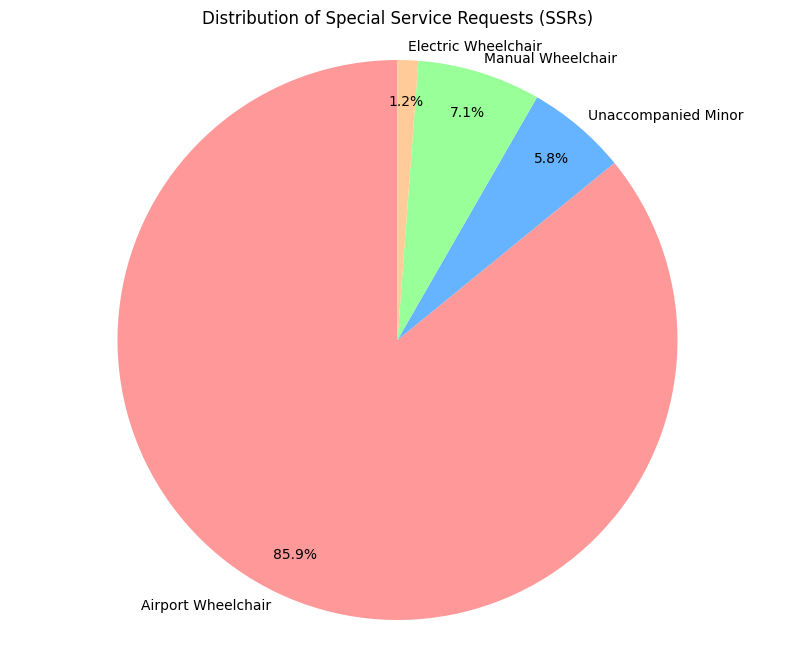

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the SSR columns
# Sum the total count for each SSR type
ssr_counts = {
    'Airport Wheelchair': df['PEOPLE_OPTED_FOR_AIRPORT_WHEELCHAIR'].sum(),
    'Unaccompanied Minor': df['PEOPLE_OPTED_FOR_UNACCOMPANIED_MINOR'].sum(),
    'Manual Wheelchair': df['PEOPLE_OPTED_FOR_MANUAL_WHEELCHAIR'].sum(),
    'Electric Wheelchair': df['PEOPLE_OPTED_FOR_ELECTRIC_WHEELCHAIR'].sum()
}

# Remove any SSRs with a count of 0 for a cleaner chart
ssr_counts = {k: v for k, v in ssr_counts.items() if v > 0}

labels = ssr_counts.keys()
sizes = ssr_counts.values()

# Define custom colors for better contrast
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, 
        pctdistance=0.85, labeldistance=1.05) # Adjusted distances for better layout
plt.title('Distribution of Special Service Requests (SSRs)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the plot to a file
plt.savefig('ssr_distribution_pie_chart.png')
plt.show()